In [1]:
import numpy as np
import pandas as pd
import sympy as sp
sp.init_printing(use_unicode=True)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='cm'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

### 1

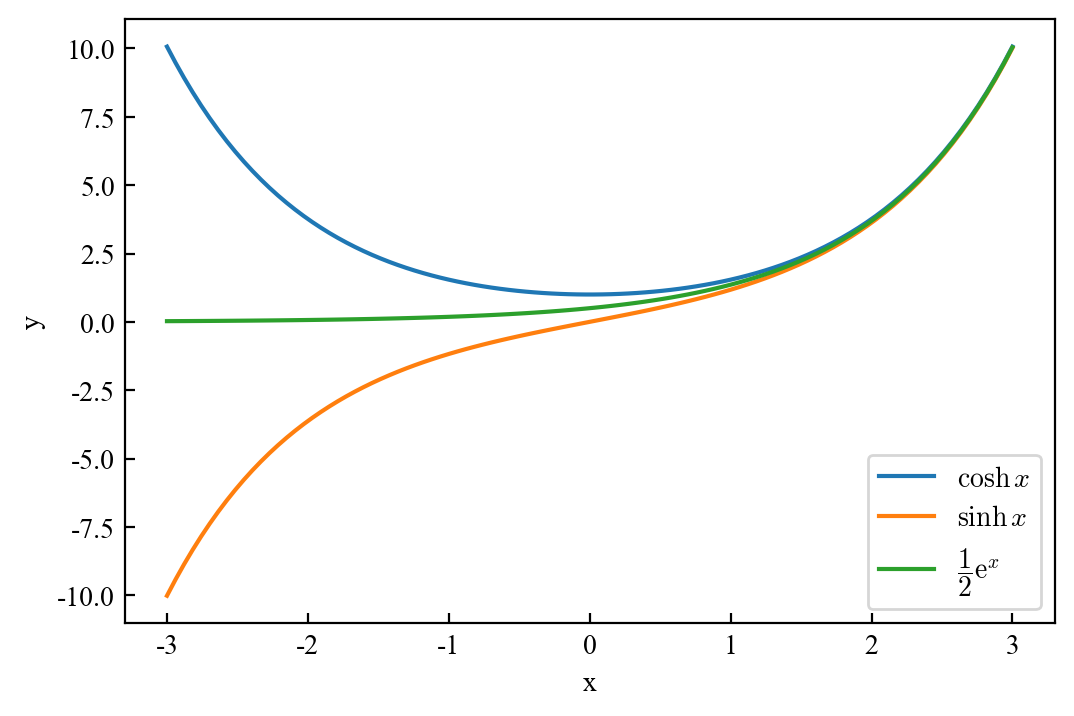

In [2]:
x = np.linspace(-3, 3, 100)
y1 = np.cosh(x)
y2 = np.sinh(x)
y3 = np.exp(x)/2
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y1, label= r'$\cosh x$')
plt.plot(x, y2, label= r'$\sinh x$')
plt.plot(x, y3, label= r'${\dfrac {1} {2} {\rm e}^x}$')
plt.legend()
plt.show()

### 2

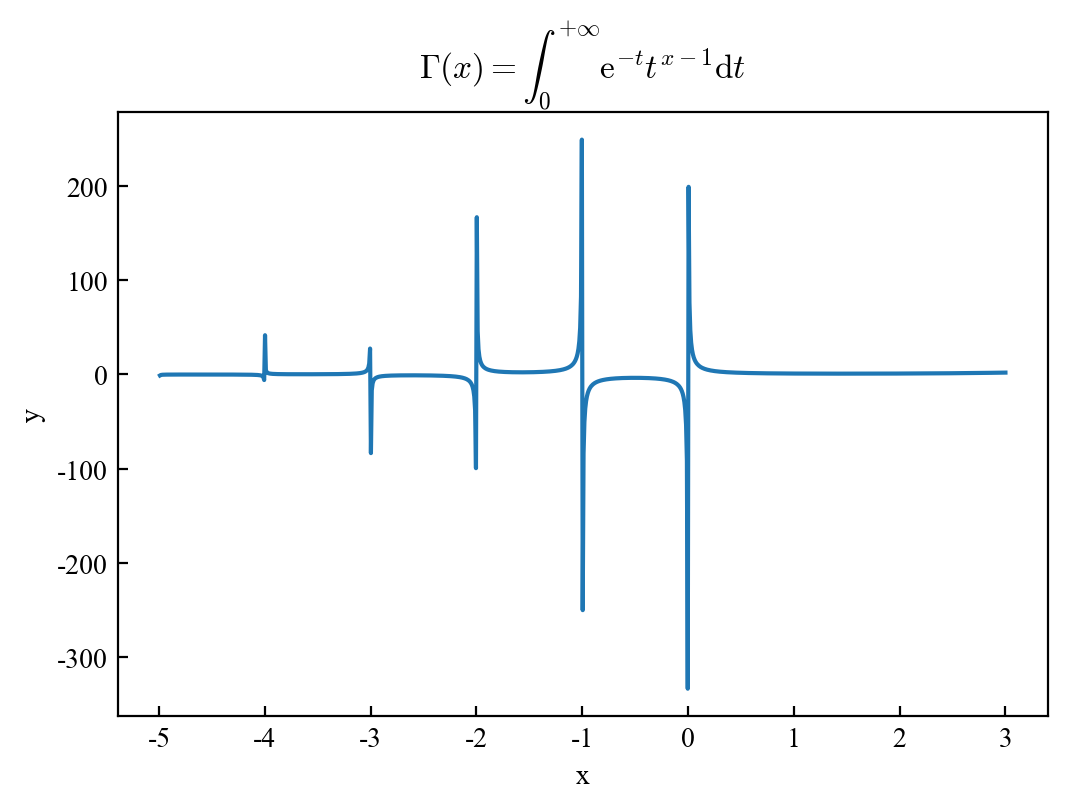

In [3]:
from scipy.special import gamma
x = np.linspace(-5, 3, 1000)
y = gamma(x)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$\Gamma(x)=\int_0^{+\infty}{\rm e}^{-t}t^{x-1}{\rm d}t$')
plt.plot(x, y)
plt.show()

### 3

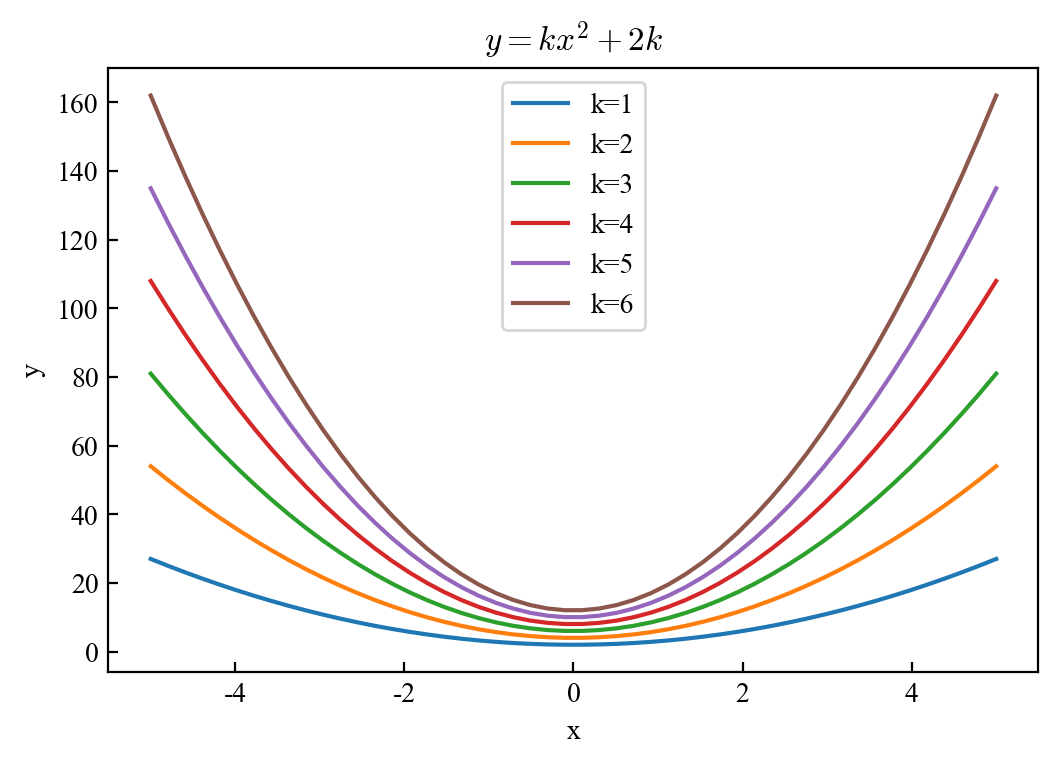

In [4]:
x = np.linspace(-5, 5, 50)
fx = lambda x, k: k*x**2 + 2*k
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$y=kx^2+2k$')
for k in range(1, 7):
    plt.plot(x, fx(x, k), label=f'{k=}')
plt.legend()
plt.show()

### 4

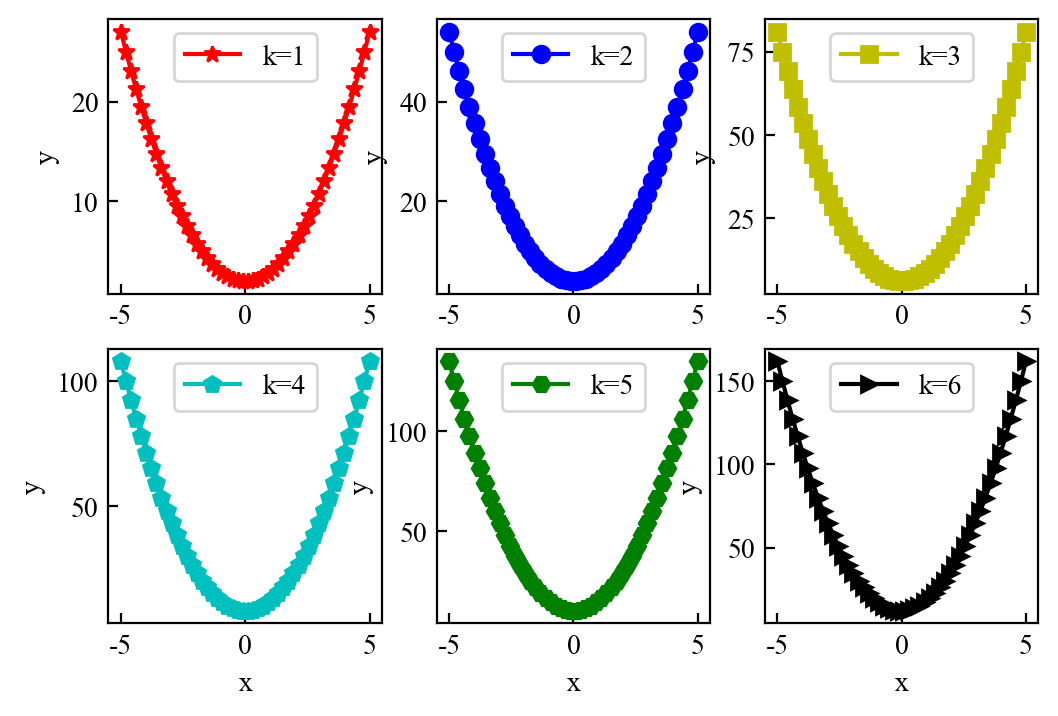

In [5]:
s=['*r-','ob-','sy-','pc-','Hg-','>k-']
for i in range(1, 7):
    plt.subplot(2, 3, i)
    # plt.title(f'$y={i}x^2+2{i}$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x, fx(x, i), s[i-1], label=f'k={i}')
    plt.legend()

    

### 5

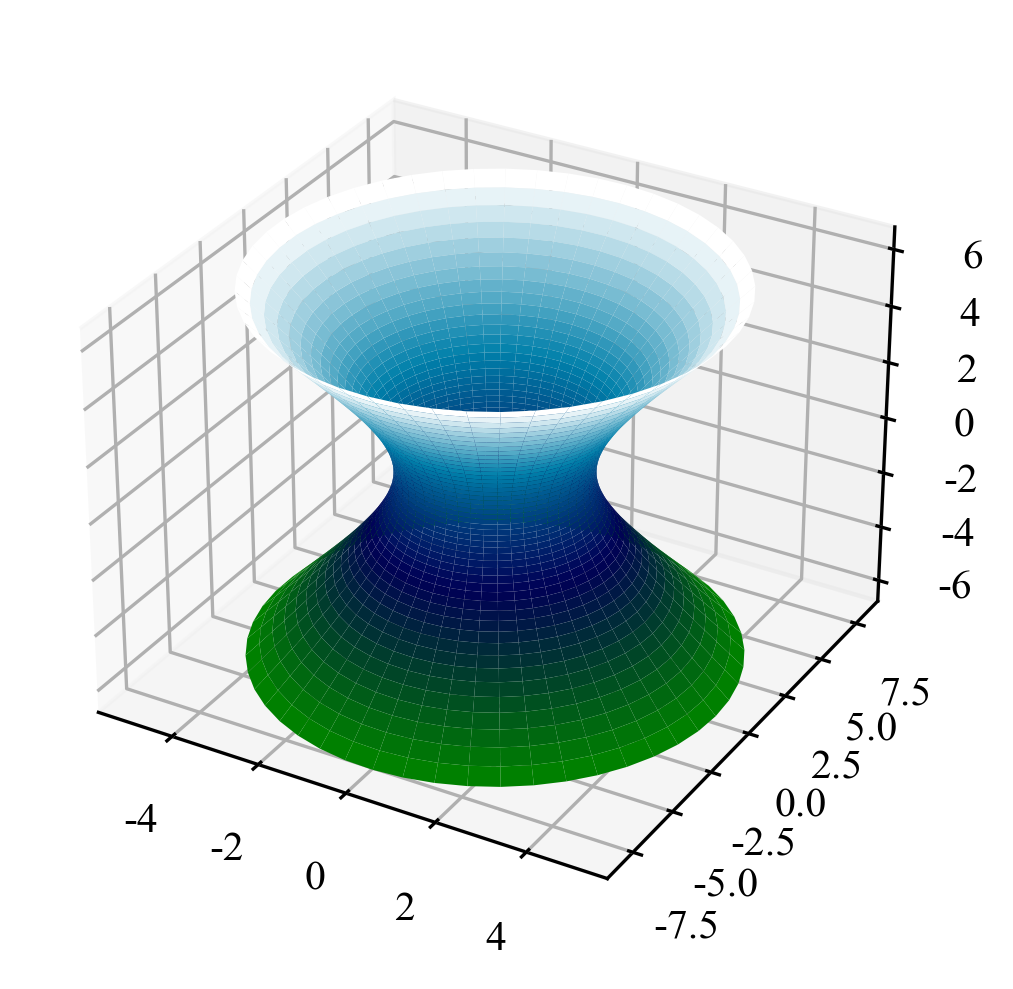

In [6]:
u = np.linspace(0,2*np.pi,50)
v = np.linspace(-np.pi/2,np.pi/2,50)
u, v = np.meshgrid(u, v)
x = 2*np.cosh(v)*np.cos(u)
y = np.sqrt(10)*np.cosh(v)*np.sin(u)
z = 2*np.sqrt(2)*np.sinh(v)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, cmap='ocean')

### 6

In [7]:
import pandas as pd
from numpy.linalg import norm

a = pd.read_excel('../02第2章  Python使用入门/附件1：区域高程数据.xlsx', header=None, nrows=874)
b = a.values
[m, n]=b.shape
x0 = np.arange(m)*50
y0 = np.arange(n)*50;
s = 0
for i in np.arange(m-1):
    for j in np.arange(n-1):
        p1 = np.array([x0[i], y0[i], b[i, j]])
        p2 = np.array([x0[i+1],y0[j],b[i+1,j]])
        p3 = np.array([x0[i+1],y0[j+1],b[i+1,j+1]])
        p4 = np.array([x0[i],y0[j+1],b[i,j+1]])
        p12 = norm(p1-p2); p23 = norm(p3-p2); p13 = norm(p3-p1)
        p14 = norm(p4-p1); p34 = norm(p4-p3)
        L1 = (p12+p23+p13)/2;s1 = np.sqrt(L1*(L1-p12)*(L1-p23)*(L1-p13))
        L2 = (p13+p14+p34)/2; s2 = np.sqrt(L2*(L2-p13)*(L2-p14)*(L2-p34))
        s = s+s1+s2
print("Area:", s)

Area: 500067906274.0693


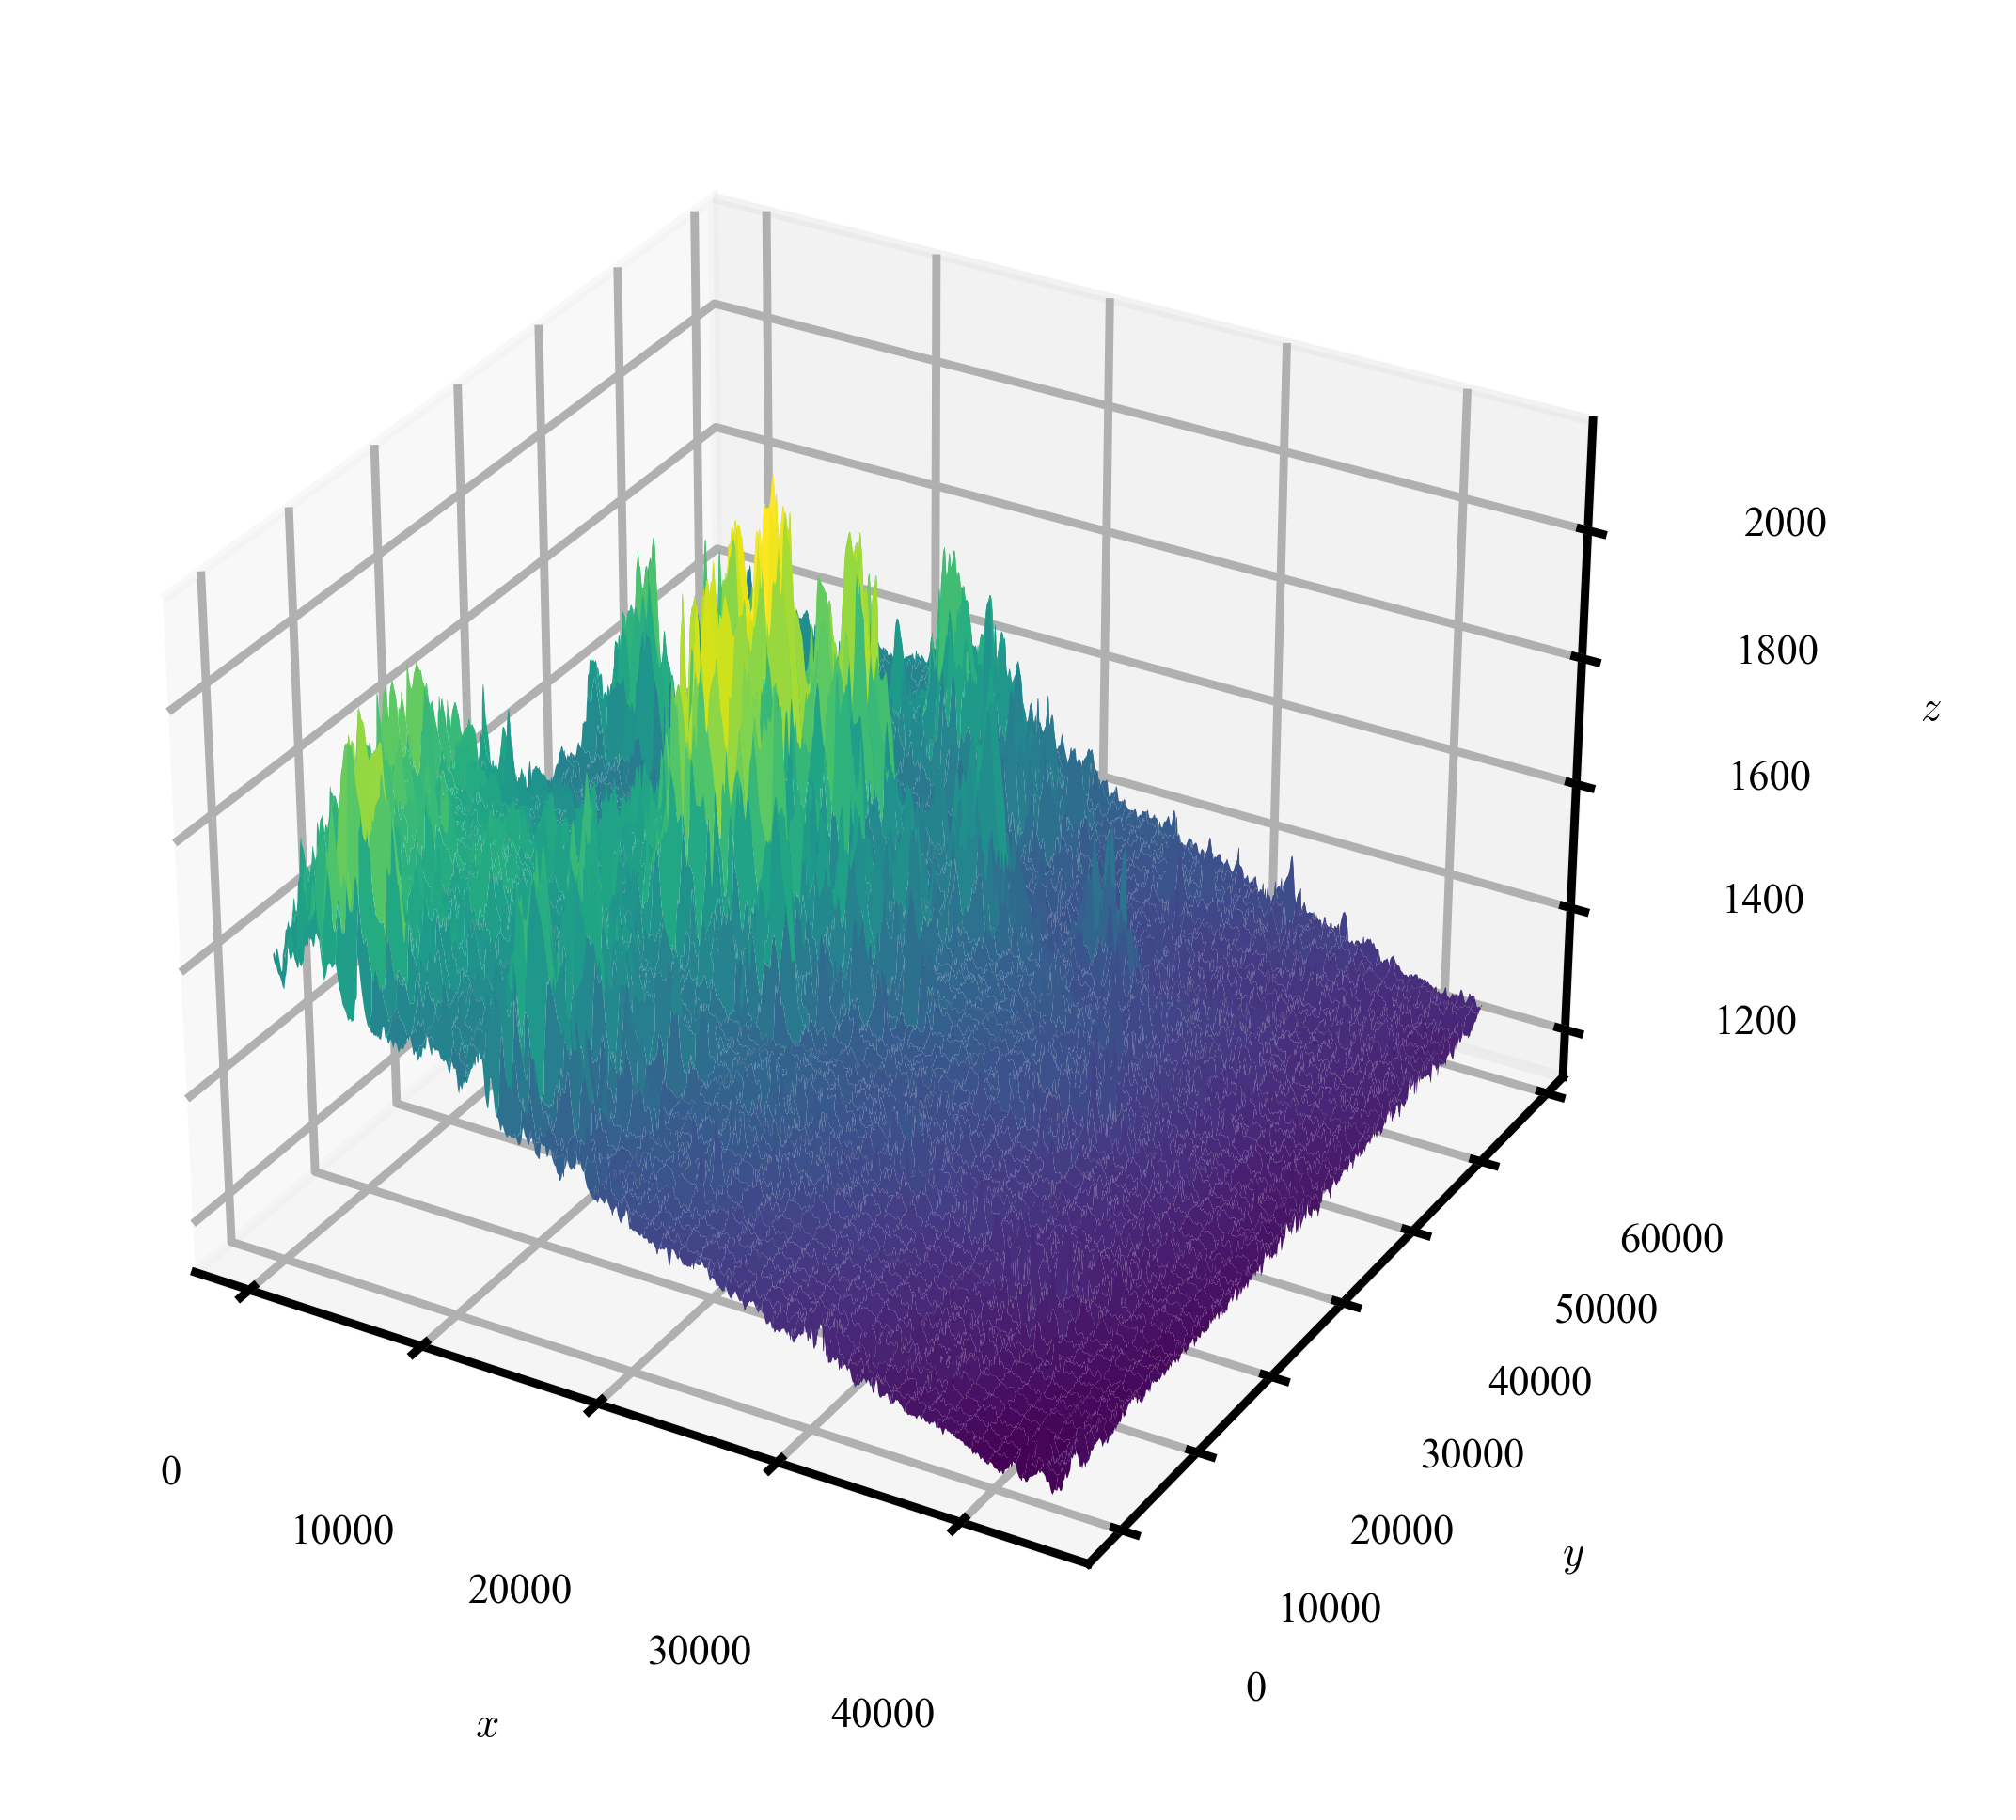

In [8]:
fig = plt.figure(dpi=800)
ax = fig.add_subplot(121, projection='3d')
X, Y = np.meshgrid(x0, y0)
ax.plot_surface(X, Y, b.T, cmap='viridis')
ax.set_xlabel('$x$', fontsize=4, labelpad=0.01)
ax.set_ylabel('$y$', fontsize=4, labelpad=0.01)
ax.set_zlabel('$z$', fontsize=4, labelpad=0.01)
ax.tick_params(which='major', labelsize=4)

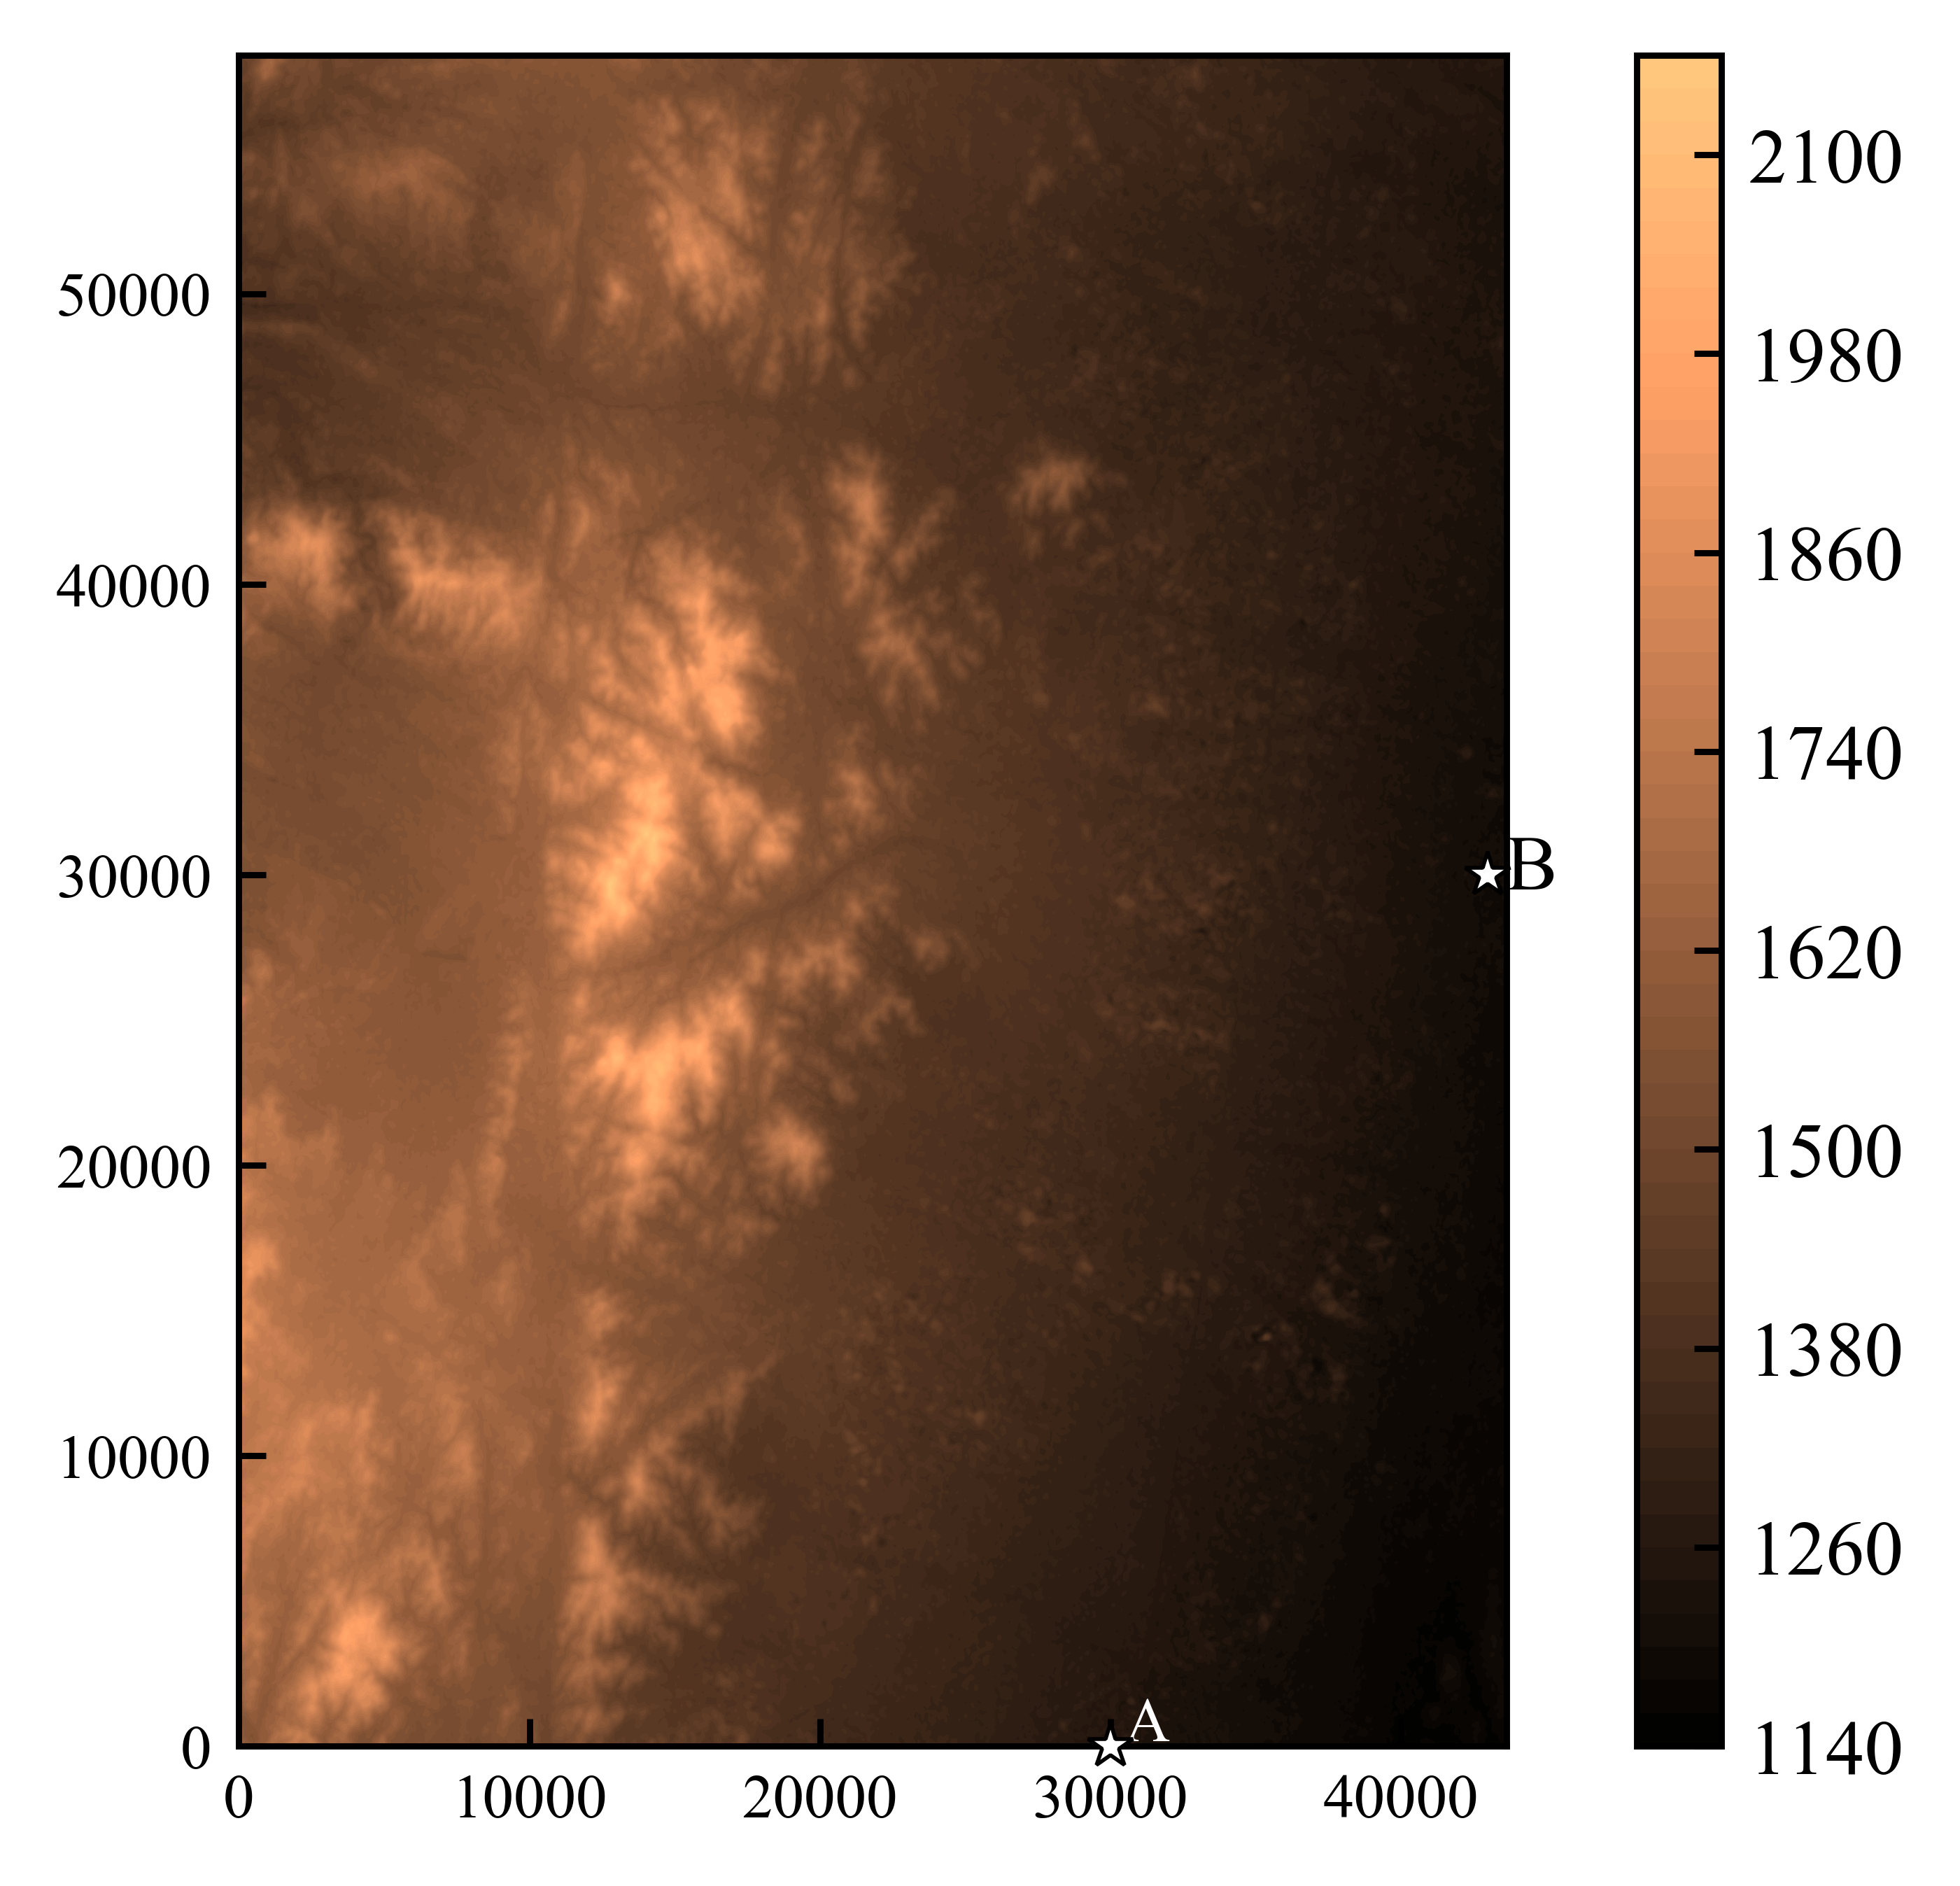

In [9]:
fig = plt.figure(dpi=800)
ax = fig.add_subplot(111)
a = ax.contourf(x0, y0, b.T, 50, cmap='copper')
ax.tick_params(which='major', labelsize=8)
ax.set_aspect(1)
fig.colorbar(a, ax=ax)
ax.plot(30000, 0, marker='*', markerfacecolor='w', markeredgecolor='k', markersize=6, markeredgewidth=0.5, clip_on=False, zorder=10)
ax.text(30500, 200, 'A', color='w', fontsize=8)
ax.plot(43000, 30000, marker='*', markerfacecolor='w', markeredgecolor='k', markersize=6, markeredgewidth=0.5, clip_on=False, zorder=10)
ax.text(43600, 29500, 'B')
ax.xaxis.set_clip_on(False)
fig.show()

### 7

In [10]:
from scipy.optimize import root
fx = lambda x: [
    4*x[0] + 2*x[1] - x[2] - 2,
    3*x[0] - x[1] + 2*x[2] - 10,
    11*x[0] + 3*x[1] - 8
]
root(fx, [0, 0, 0])

    fjac: array([[-0.33104236, -0.24828177, -0.91036648],
       [ 0.47301616, -0.87845859,  0.06757374],
       [ 0.81649658,  0.40824829, -0.40824829]])
     fun: array([-1.9999998 , -1.00000026,  1.00000013])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 18
     qtf: array([ 1.09794584e-06,  7.68448164e-07, -2.44948974e+00])
       r: array([-1.20830460e+01, -3.14490238e+00, -1.65521178e-01,  2.02721214e+00,
       -2.22993335e+00, -3.33066907e-16])
  status: 5
 success: False
       x: array([-1534.0555961 ,  5627.87051908,  5119.51865357])

*Not Good*

In [11]:
A = np.array([[4, 2, -1], [3, -1, 2], [11, 3, 0]])
b = np.array([[2], [10], [8]])
Ab = np.hstack([A, b])
r1 = np.linalg.matrix_rank(A)
r2 = np.linalg.matrix_rank(Ab)
print(f'{r1 = }, {r2 = }')
x = np.linalg.pinv(A)@b
np.round(x, 4)

r1 = 2, r2 = 3


array([[ 1.213 ],
       [-1.4478],
       [ 1.9565]])

In [12]:
from scipy.optimize import least_squares
f = lambda x: [
    2*x[0] + 3*x[1] + 1*x[2],
    1*x[0] - 2*x[1] + 4*x[2],
    3*x[0] + 8*x[1] - 2*x[2],
    4*x[0] - 1*x[1] + 9*x[2]
]
least_squares(f, [1, 2, 3])

 active_mask: array([0., 0., 0.])
        cost: 0.0
         fun: array([0., 0., 0., 0.])
        grad: array([0., 0., 0.])
         jac: array([[ 2.,  3.,  1.],
       [ 1., -2.,  4.],
       [ 3.,  8., -2.],
       [ 4., -1.,  9.]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 3
        njev: 3
  optimality: 0.0
      status: 1
     success: True
           x: array([-1.11659783,  0.55829892,  0.55829892])

### 8

In [13]:
from scipy.optimize import root
def fx(x):
    ret = []
    ret.append(4*x[0] + x[1] - 1)
    for i in range(1, 999):
        ret.append(x[i-1] + 4*x[i] + x[i+1] - i - 1)
    ret.append(x[998] + 4*x[999] - 1000)
    return ret

root(fx, np.random.randn(1000))

    fjac: array([[-9.70142500e-01, -2.42535625e-01,  2.12081271e-15, ...,
        -5.62043376e-11, -1.62704145e-10, -3.99549583e-11],
       [ 2.33861712e-01, -9.35446850e-01, -2.65043186e-01, ...,
         4.65855135e-11,  1.34858983e-10,  3.31170667e-11],
       [-6.19370319e-02,  2.47748128e-01, -9.29055786e-01, ...,
        -4.66688053e-11, -1.35100412e-10, -3.31763246e-11],
       ...,
       [ 1.24265501e-10, -8.05391820e-11,  7.79808312e-11, ...,
        -9.28202351e-01, -2.67951882e-01,  4.80499257e-09],
       [ 1.80012710e-10, -1.16670264e-10,  1.12964412e-10, ...,
         2.48713726e-01, -9.28202407e-01, -2.67949578e-01],
       [ 9.48494581e-13, -6.14716927e-13,  5.95140692e-13, ...,
        -6.91721666e-02,  2.58151276e-01, -9.63432937e-01]])
     fun: array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00

OR

In [14]:
A = 4*np.eye(1000) + np.eye(1000, k=-1) + np.eye(1000, k=1)
np.linalg.inv(A)@np.arange(1, 1001).reshape(1000, 1)

array([[1.66666667e-01],
       [3.33333333e-01],
       [5.00000000e-01],
       [6.66666667e-01],
       [8.33333333e-01],
       [1.00000000e+00],
       [1.16666667e+00],
       [1.33333333e+00],
       [1.50000000e+00],
       [1.66666667e+00],
       [1.83333333e+00],
       [2.00000000e+00],
       [2.16666667e+00],
       [2.33333333e+00],
       [2.50000000e+00],
       [2.66666667e+00],
       [2.83333333e+00],
       [3.00000000e+00],
       [3.16666667e+00],
       [3.33333333e+00],
       [3.50000000e+00],
       [3.66666667e+00],
       [3.83333333e+00],
       [4.00000000e+00],
       [4.16666667e+00],
       [4.33333333e+00],
       [4.50000000e+00],
       [4.66666667e+00],
       [4.83333333e+00],
       [5.00000000e+00],
       [5.16666667e+00],
       [5.33333333e+00],
       [5.50000000e+00],
       [5.66666667e+00],
       [5.83333333e+00],
       [6.00000000e+00],
       [6.16666667e+00],
       [6.33333333e+00],
       [6.50000000e+00],
       [6.66666667e+00],


### 9

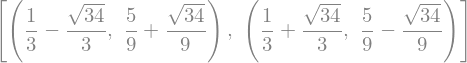

In [15]:
x, y = sp.var('x y')
f = [x**2 - y - x - 3, x + 3*y - 2]
sp.solve(f, [x, y])

In [16]:
from scipy.optimize import fsolve
f = lambda x: [x[0]**2 - x[1] - x[0] - 3, x[0] + 3*x[1] - 2]
print(fsolve(f, [0, 0]), fsolve(f, [2, 0]), sep='\n')

[-1.6103173  1.2034391]
[ 2.27698396 -0.09232799]


### 10

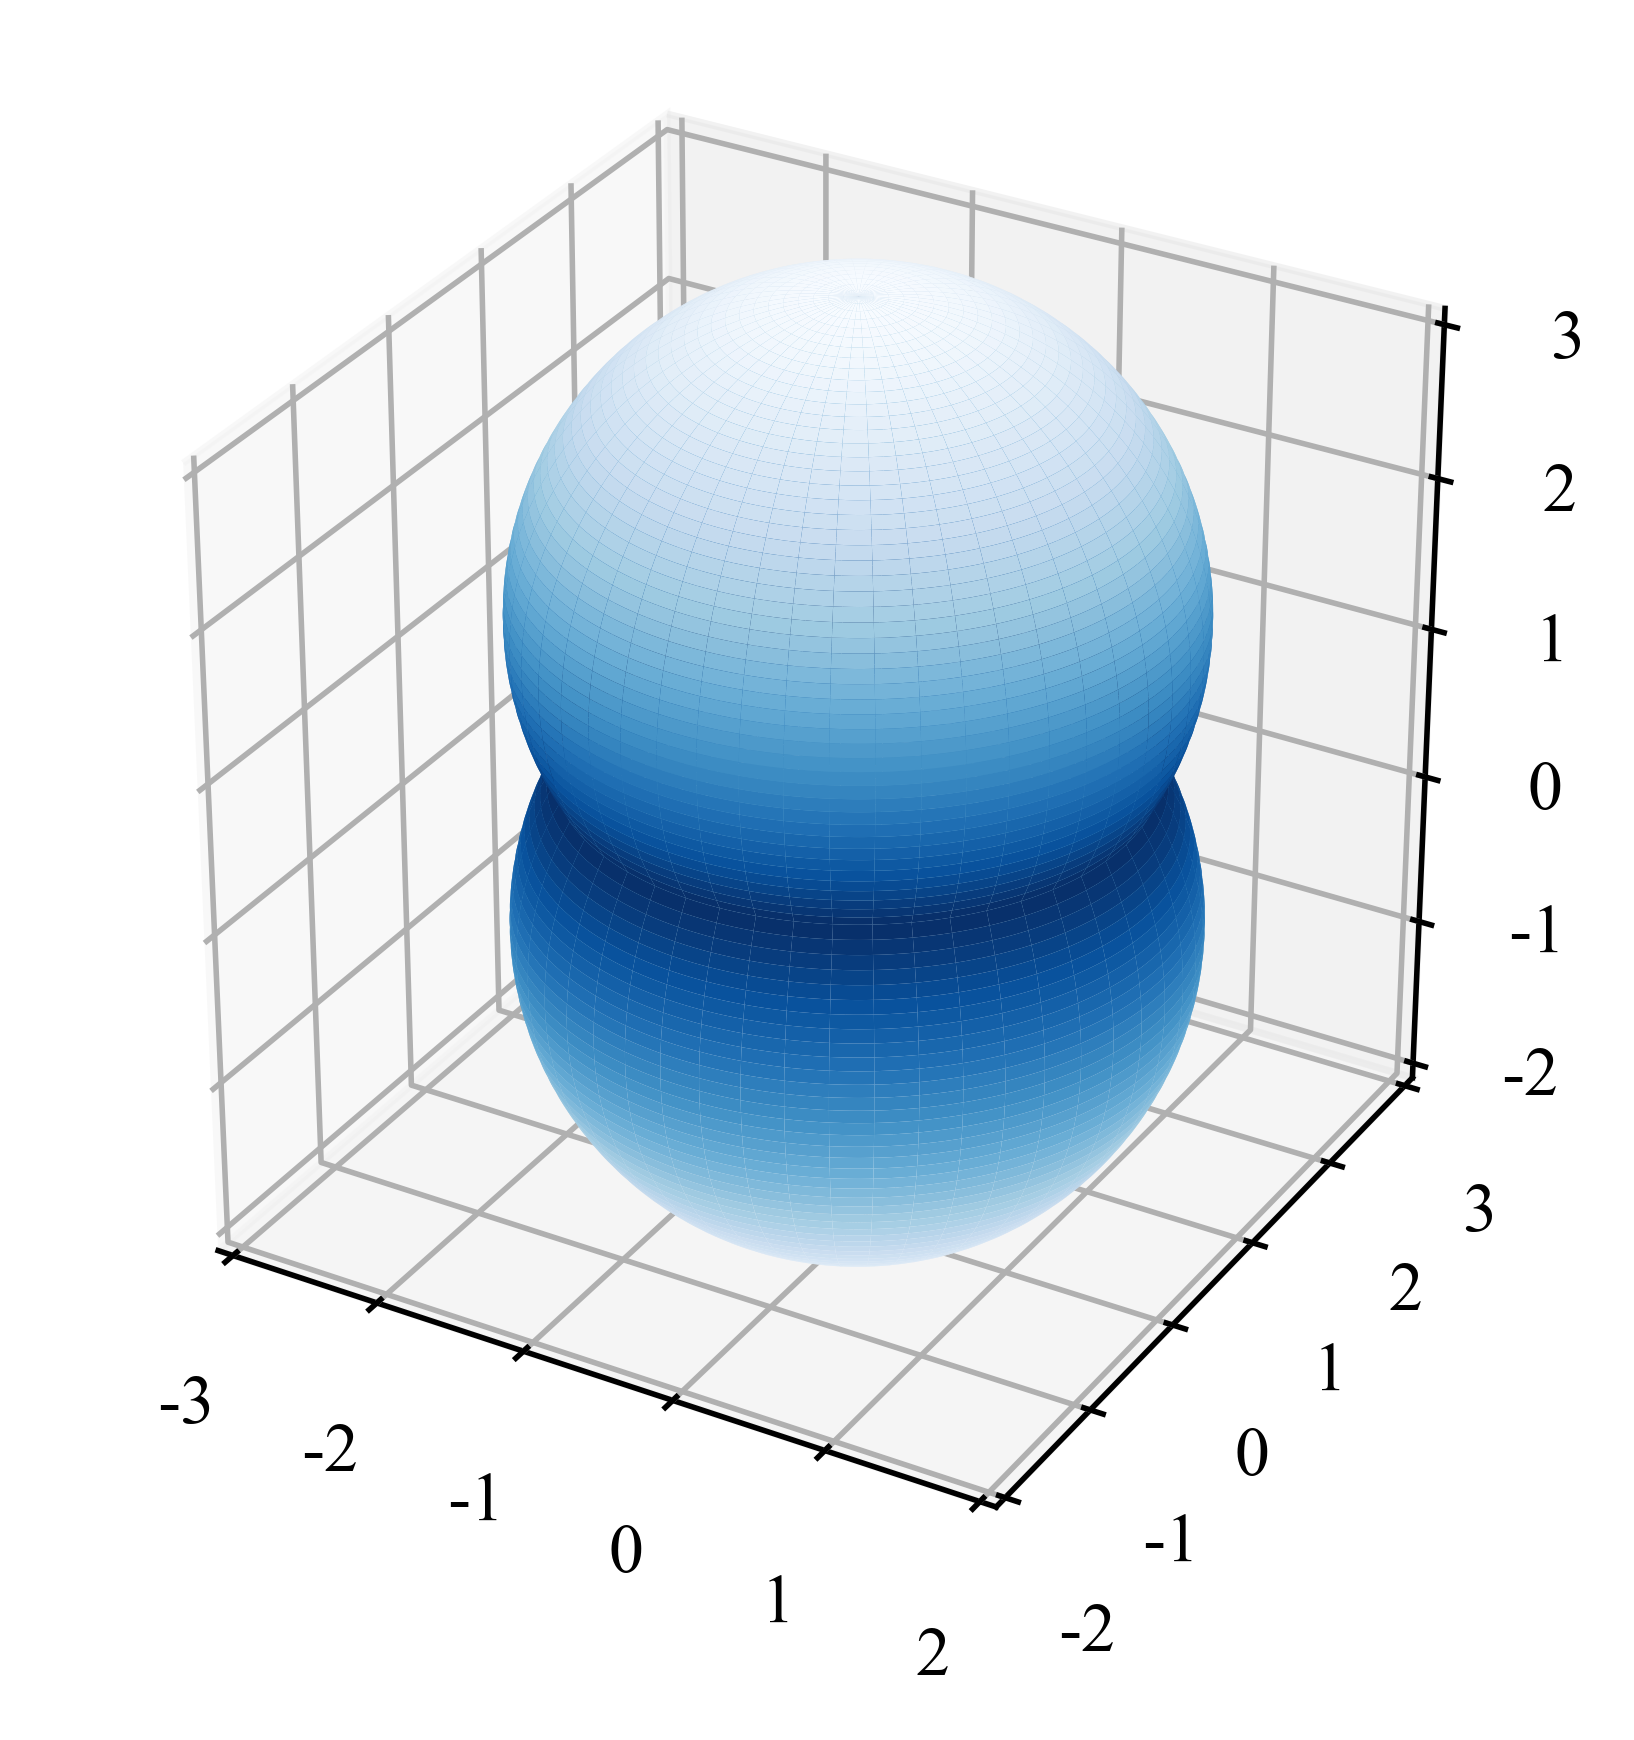

In [17]:
u1 = np.linspace(0, np.pi*(2/3), 1000)
u2 = np.linspace(np.pi*(1/3), np.pi, 1000)
v = np.linspace(-np.pi, np.pi, 1000)
u1, V = np.meshgrid(u1, v)
u2, V = np.meshgrid(u2, v)
x1 = 2*np.sin(u1)*np.cos(V)
y1 = 2*np.sin(u1)*np.sin(V)
x2 = 2*np.sin(u2)*np.cos(V)
y2 = 2*np.sin(u2)*np.sin(V)
z1 = 2 + 2*np.cos(u1)
z2 = 2*np.cos(u2)
fig = plt.figure(dpi=500)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, y1, z1, cmap='Blues_r')
ax.plot_surface(x2, y2, z2, cmap='Blues')
ax.set_box_aspect((1, 1, 1))  # x、y、z轴刻度之比为1:1:1
ax.set_xlim(-3, 2)
ax.set_ylim(-2, 3)
ax.set_zlim(-2, 3)

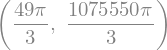

In [18]:
y = sp.var('y')
f1 = sp.pi*(4*y - y**2)
f2 = sp.pi*(4 - y**2)
V = sp.integrate(f1, (y, 1, 3)) + sp.integrate(f2, (y, -2, 1))
W = 1000*sp.Rational(98, 10)*\
    (sp.integrate(f1*(3-y), (y, 1, 3)) + sp.integrate(f2*(3-y), (y, -2, 1)))
V, W

### 11

In [19]:
f = lambda x: (np.abs(x+1) - np.abs(x-1))/2 + np.sin(x)
g = lambda x: (np.abs(x+3) - np.abs(x-3))/2 + np.cos(x)
eqs = lambda x: [
    2*x[0] - 3*f(x[2]) - 4*g(x[3]) + 1,
    3*x[1] - 2*f(x[2]) - 6*g(x[3]) + 2,
    x[2] - f(x[0]) - 3*g(x[1]) + 3,
    5*x[3] - 4*f(x[0]) - 6*g(x[1]) + 1
]

from scipy.optimize import least_squares
least_squares(eqs, np.random.randn(4))

 active_mask: array([0., 0., 0., 0.])
        cost: 1.1847793802405793e-21
         fun: array([ 1.96695993e-11,  3.66267017e-11, -6.13287199e-12, -2.45670151e-11])
        grad: array([ 2.11952368e-10,  2.26332611e-10, -2.26168988e-10, -4.16611006e-10])
         jac: array([[ 2.        ,  0.        , -4.99090701, -3.93750572],
       [-0.        ,  3.        , -3.32727134, -5.90625858],
       [-1.65336809, -2.10709307,  1.        ,  0.        ],
       [-6.61347234, -4.21418613, -0.        ,  5.        ]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 6
        njev: 6
  optimality: 4.1661100628777846e-10
      status: 1
     success: True
           x: array([-0.85877135,  0.3022151 , -0.84512781,  0.01562419])

### 12

In [20]:
A = np.array([[-1, 1, 0], [-4, 3, 0], [1, 0, 2]])
va1,ve1 =  np.linalg.eig(A)
va1, ve1

(array([2., 1., 1.]),
 array([[ 0.        ,  0.40824829,  0.40824829],
        [ 0.        ,  0.81649658,  0.81649658],
        [ 1.        , -0.40824829, -0.40824829]]))

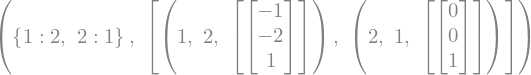

In [21]:
A = sp.Matrix([[-1, 1, 0], [-4, 3, 0], [1, 0, 2]])
va2 = A.eigenvals()
ve2 = A.eigenvects()
va2, ve2

### 13

In [22]:
f = lambda x: (np.abs(x+1) - np.abs(x-1))/2 + np.sin(x)
g = lambda x: (np.abs(x+3) - np.abs(x-3))/2 + np.cos(x)
from scipy.optimize import least_squares
eqs = lambda z: [
    3*f(z[2])+4*g(z[3])-1-2*z[0],
    2*f(z[2])+6*g(z[3])-2-3*z[1],
    f(z[0])+3*g(z[1])-3-z[2],
    4*f(z[0])+6*g(z[1])-1-5*z[3],
    f(z[3])+g(z[1])-2-z[0]-z[2],
    2*f(z[0])-10*g(z[2])-5-z[1]-3*z[3]
]
least_squares(eqs, np.random.randn(4))

 active_mask: array([0., 0., 0., 0.])
        cost: 1.272268065490977
         fun: array([-1.1457066 ,  0.20268807,  0.08987795, -0.13435337,  1.07230831,
       -0.12180344])
        grad: array([ 9.88072662e-07,  3.68875341e-06, -5.21629216e-06, -3.38660232e-05])
         jac: array([[ -2.        ,   0.        ,   1.16581907,   3.77839744],
       [ -0.        ,  -3.        ,   0.77721272,   5.66759616],
       [  1.76389688,   2.72253367,  -1.        ,   0.        ],
       [  7.05558753,   5.44506735,  -0.        ,  -5.        ],
       [ -1.        ,   0.90751122,  -1.        ,   1.9984642 ],
       [  3.52779377,  -1.        , -19.21403853,  -3.        ]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 9
        njev: 9
  optimality: 3.386602323618426e-05
      status: 2
     success: True
           x: array([-0.70146609,  0.09262115, -1.17167772,  0.055429  ])